## 1. Merging 2016 pictures

In [350]:
import cv2

In [351]:
from matplotlib import pyplot as plt 

In [352]:
import numpy as np

In [353]:
image1 = cv2.imread("040012.tif",cv2.IMREAD_COLOR)
image2 = cv2.imread("040013.tif",cv2.IMREAD_COLOR)
image3 = cv2.imread("040014.tif",cv2.IMREAD_COLOR)

In [354]:
image3.shape

(17310, 11310, 3)

In [355]:
image2.shape
pic_y = 17310
pic_x = 11310

In [356]:
bound_y_length1 = 3316
bound_x_length1 = 10

bound_y_length2 = 6585
bound_x_length2 = 58

In [357]:
roi1 = image1[bound_x_length1:pic_y, 0:bound_y_length1]
print(roi1.shape)

(17300, 3316, 3)


In [358]:
roi2 = image2[0:pic_y-bound_x_length1, 0:pic_x-bound_y_length1]
print(roi2.shape)

(17300, 7994, 3)


In [359]:
temp_pic = cv2.hconcat([roi1,roi2])

(17300, 11310, 3)


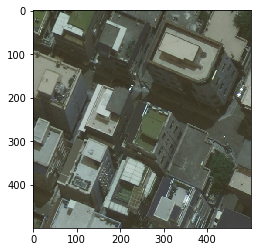

In [360]:
print(temp_pic.shape)
test1 = temp_pic[0:500, bound_y_length1-250:bound_y_length1+250]
plt.imshow(test1)

In [361]:
temp_pic2 = temp_pic[bound_x_length2:pic_y, 0:pic_x]
print(temp_pic2.shape)

(17242, 11310, 3)


In [362]:
roi3 = image3[0:pic_y-(bound_x_length1+bound_x_length2), pic_x - bound_y_length2:pic_x]
print(roi3.shape)

(17242, 6585, 3)


In [363]:
ans_pic = cv2.hconcat([temp_pic2,roi3])

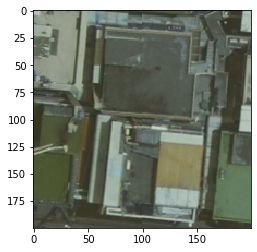

In [364]:
test = ans_pic[12000:12200, 11310-100:11310+100]
plt.imshow(test)

In [366]:
print(ans_pic.shape)
pic_2016 = ans_pic

(17242, 17895, 3)


.

.

## 2. Merging 2018 pictures

In [367]:
image1 = cv2.imread("201804110000031010.tif",cv2.IMREAD_COLOR)
image2 = cv2.imread("201804110000031011.tif",cv2.IMREAD_COLOR)
image3 = cv2.imread("201804110000031012.tif",cv2.IMREAD_COLOR)

In [368]:
image1.shape

(17310, 11310, 3)

In [369]:
pic_y = 17310
pic_x = 11310

bound_y_length1 = 3705
bound_x_length1 = 112

bound_y_length2 = 7150
bound_x_length2 = 100

In [370]:
roi1 = image1[bound_x_length1:pic_y, 0:bound_y_length1]
print(roi1.shape)

(17198, 3705, 3)


In [371]:
roi2 = image2[0:pic_y-bound_x_length1, 0:pic_x-bound_y_length1]
print(roi2.shape)

(17198, 7605, 3)


In [372]:
temp_pic = cv2.hconcat([roi1,roi2])

(17198, 11310, 3)


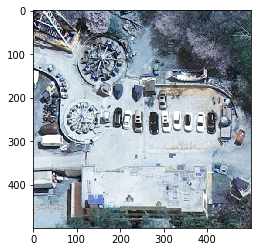

In [373]:
print(temp_pic.shape)
test1 = temp_pic[0:500, bound_y_length1-250:bound_y_length1+250]
plt.imshow(test1)

In [374]:
temp_pic2 = temp_pic[bound_x_length2:pic_y, 0:pic_x]
print(temp_pic2.shape)

(17098, 11310, 3)


In [375]:
roi3 = image3[0:pic_y-(bound_x_length1+bound_x_length2), pic_x - bound_y_length2:pic_x]
print(roi3.shape)

(17098, 7150, 3)


In [376]:
ans_pic = cv2.hconcat([temp_pic2,roi3])

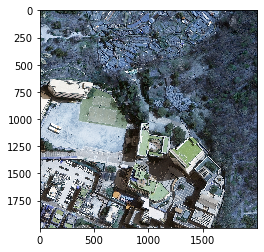

In [377]:
test = ans_pic[5000:7000, 11310-1000:11310+1000]
plt.imshow(test)

In [380]:
print(ans_pic.shape)
pic_2018 = ans_pic

(17098, 18460, 3)


.

.

## 3. Get difference "pic_2016" and "pic_2018"

In [349]:
def get_match_confidence(img1, img2, mask=None):
    if img1.shape != img2.shape:
        return False
    ## first try, using absdiff
    # diff = cv2.absdiff(img1, img2)
    # h, w, d = diff.shape
    # total = h*w*d
    # num = (diff<20).sum()
    # print 'is_match', total, num
    # return num > total*0.90
    if mask is not None:
        img1 = img1.copy()
        img1[mask!=0] = 0
        img2 = img2.copy()
        img2[mask!=0] = 0
    ## using match
    match = cv2.matchTemplate(img1, img2, cv2.TM_CCOEFF_NORMED)
    _, confidence, _, _ = cv2.minMaxLoc(match)
    print confidence
    return confidence 

In [381]:
get_match_confidence(pic_2016, pic_2018)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 7575951336 bytes in function 'cv::OutOfMemoryError'
